In [1]:
import sympy.vector as sv
import sympy as sp
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [22]:
def vector(x ,y ,u, v, rt1 = 0.1, rt2 = 1/3, fig=False, color = 'black', showgrid = True, zeroline=True, lw=3):
    
    '''
    (x,y): initial point of the vector
    (u ,v): the projection of the vector along x and y axis
    
    
    The ideia of the below function is as follow. First, we write the parametric equation for the segment of 
    the line that pass through $(0,0)$ and $(x_0, y_0)$. It is 
    $$
    \vec r(t) = \begin{cases}
    x = (x_1 - x_0) t + x_0 \\
    y = (y_1 - y_0) t + y_0
    \end{cases}
     = 
     \begin{cases}
    x = a t + x_0 \\
    y = b t + y_0
    \end{cases}
    $$
    Then using the variable *rt1* we decide about the proportion of the head of the vector em relation to 
    the total length of vector. The variable *rt2* is about the proportion of the base 
    of the triangle em relation to its altitude. *l* is the total length of the vector. *t = 1-ratio1* is the 
    parameter of the line $\vec r(t)$ that the base of the head is located, 
    we call this point as $(\hat x , \hat y)$. Through this point, perpendicular to the $\vec r$ passes 
    another line that is base of the head. The equation of this line is 
    $$
    \vec{r^\prime} = \begin{cases}
    x = b s + \hat x \\
    y = -a s + \hat y
    \end{cases}
    $$
    Now we want to find other two corners of the head, beside $(x_0,y_0)$. These two points are located of 
    the both side of $(\hat x , \hat y)$ with the distance $\frac{lenght2}{2}$. 
    The value of parameter $s$ associated with these points is $\hat s = \pm \frac{length2}{2 l}$. 
    So these two points are 
    $(b \hat s +\hat x, -a \hat s + \hat y)$ and $(-b \hat s +\hat x, a \hat s +\hat y)$.
    
    Example:
    ========
    R = sv.CoordSys3D("R")
    x,y,z = sp.symbols('x y z')
    def field1(x,y): return -y*R.i + x*R.j
    xx, yy = np.mgrid[-5:5:5j, -5:5:5j]
    field1_np = sp.lambdify([x,y], list(field1(x,y).components.values()), 'numpy')
    u,v = field1_np(xx,yy)
    f = vector(x=xx.flatten(),y=yy.flatten(), u=u.flatten(), v=v.flatten())
    '''
    df = pd.DataFrame(columns=['x','y'])

    for x_0,u,y_0,v in zip(x,u,y,v):
        x_1 = x_0 + u
        y_1 = y_0 + v

        a = x_1 - x_0
        b = y_1 - y_0
        
        l = np.sqrt(a**2 + b**2)
        length1 = rt1 *l
        length2 = rt2 * length1

        t = (1-rt1)
        x_bar , y_bar = a * t + x_0, b * t + y_0
        
        s_bar = length2/(2*l)

        x_11 = b*s_bar+x_bar
        x_12 = -b*s_bar+x_bar
        y_11 = -a*s_bar +y_bar
        y_12 = a*s_bar+y_bar

        df = df.append({'x':x_1, 'y':y_1}, ignore_index=True)
        df = df.append({'x':x_11, 'y':y_11}, ignore_index=True)
        df = df.append({'x':x_12, 'y':y_12}, ignore_index=True)
        df = df.append({'x':x_1, 'y':y_1}, ignore_index=True)
        df = df.append({'x':None, 'y':None}, ignore_index=True)
        df = df.append({'x':x_0, 'y':y_0}, ignore_index=True)
        df = df.append({'x':x_bar, 'y':y_bar}, ignore_index=True)
        df = df.append({'x':None, 'y':None}, ignore_index=True)
    
    if fig==False:
        fig = go.Figure()
        fig.add_scatter(x = df.x, y=df.y,fill='toself', mode = 'lines', opacity=1,line_color = color, line_width=lw)
        fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1),showlegend = False)
        fig.update_xaxes(showgrid=showgrid, zeroline=zeroline)
        fig.update_yaxes(showgrid=showgrid, zeroline=zeroline)
        fig.show()
    else:
        fig.add_scatter(x = df.x, y=df.y,fill='toself', mode = 'lines', opacity=1,line_color = color, line_width=lw)
        fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1),showlegend = False)
        fig.update_xaxes(showgrid=showgrid, zeroline=zeroline)
        fig.update_yaxes(showgrid=showgrid, zeroline=zeroline)

In [3]:
R = sv.CoordSys3D("R")

In [4]:
x,y,z = sp.symbols('x y z')

In [5]:
def field1(x,y): return -y*R.i + x*R.j

In [28]:
xx, yy = np.mgrid[-5:5:5j, -5:5:5j]

In [29]:
field1_np = sp.lambdify([x,y], list(field1(x,y).components.values()), 'numpy')

In [30]:
u,v = field1_np(xx,yy)

In [31]:
xx.flatten()

array([-5. , -5. , -5. , -5. , -5. , -2.5, -2.5, -2.5, -2.5, -2.5,  0. ,
        0. ,  0. ,  0. ,  0. ,  2.5,  2.5,  2.5,  2.5,  2.5,  5. ,  5. ,
        5. ,  5. ,  5. ])

In [32]:
u

array([[ 5. ,  2.5, -0. , -2.5, -5. ],
       [ 5. ,  2.5, -0. , -2.5, -5. ],
       [ 5. ,  2.5, -0. , -2.5, -5. ],
       [ 5. ,  2.5, -0. , -2.5, -5. ],
       [ 5. ,  2.5, -0. , -2.5, -5. ]])

/home/vahid/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning:

invalid value encountered in double_scalars



,x,y
0,0.000000,-10.000000
1,-0.583333,-9.583333
2,-0.416667,-9.416667
3,0.000000,-10.000000
4,NaN,NaN
...,...,...
195,0.000000,10.000000
196,NaN,NaN
197,5.000000,5.000000
198,0.500000,9.500000


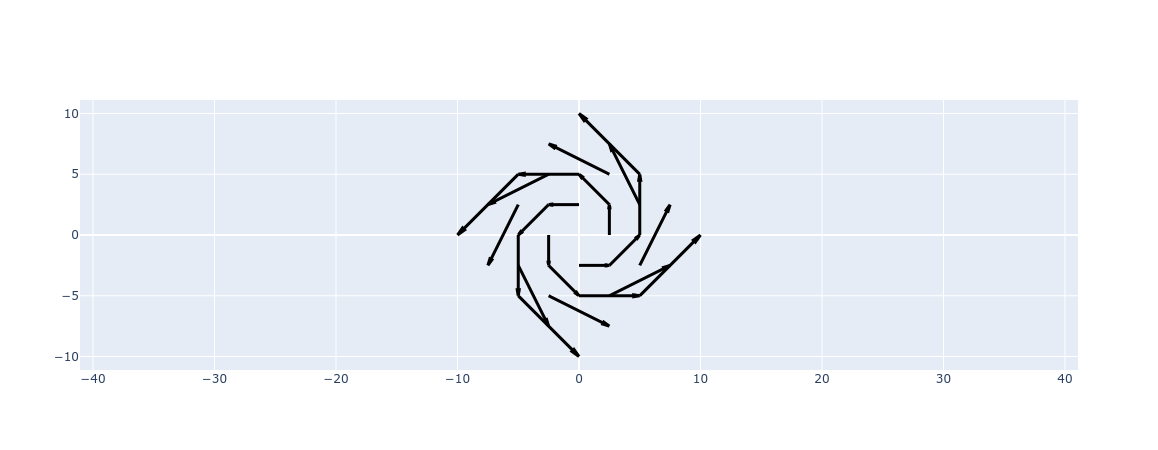

In [33]:
f = vector(x=xx.flatten(),y=yy.flatten(), u=u.flatten(), v=v.flatten())

In [19]:
type(f)

NoneType